In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from stockfish import Stockfish
import chess
import chess.engine
import math
import random
from evaluation_pipeline_copy import generate_synthetic_data_dict
from plot_functions import bar_plot

In [3]:
percentages = [0, 25, 50, 75, 100]
legal_moves_count = [0, 961, 981, 974, 988]


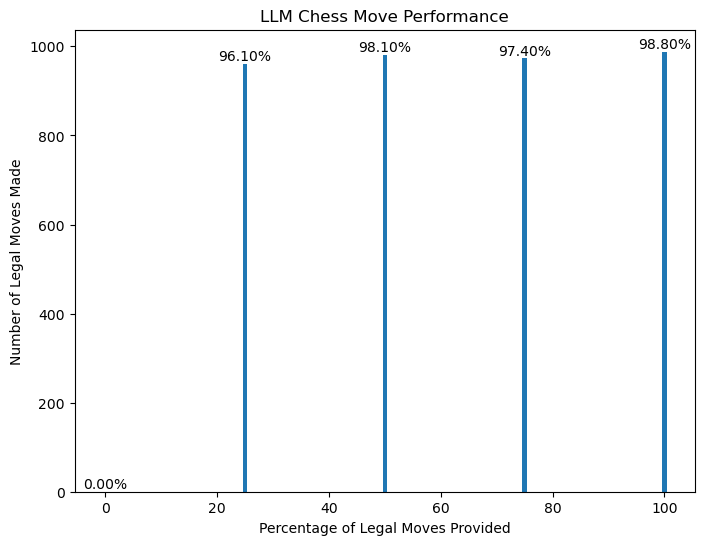

In [4]:
bar_plot(percentages,legal_moves_count,1000,'Percentage of Legal Moves Provided','Number of Legal Moves Made','LLM Chess Move Performance')


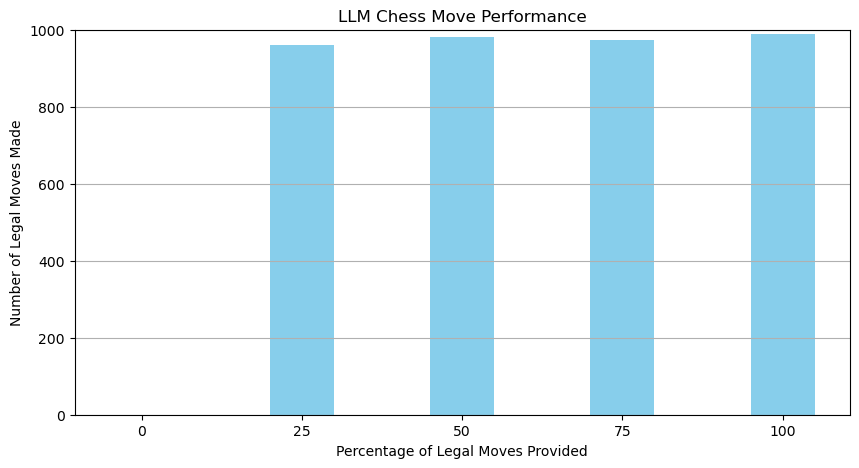

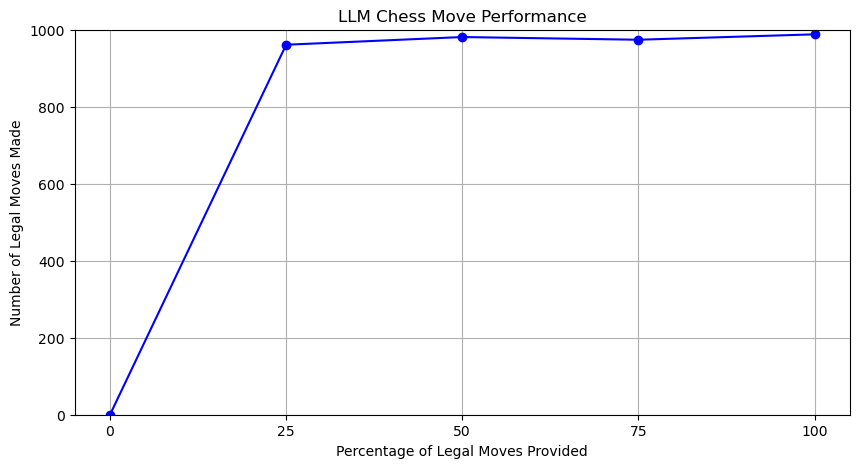

In [ ]:


percentages = [0, 25, 50, 75, 100]
legal_moves_count = [0, 961, 981, 974, 988]

plt.figure(figsize=(10, 5))
plt.bar(percentages, legal_moves_count, color='skyblue', width=10)
plt.xlabel('Percentage of Legal Moves Provided')
plt.ylabel('Number of Legal Moves Made')
plt.title('LLM Chess Move Performance')
plt.xticks(percentages)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='-')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(percentages, legal_moves_count, marker='o', linestyle='-', color='b')
plt.xlabel('Percentage of Legal Moves Provided')
plt.ylabel('Number of Legal Moves Made')
plt.title('LLM Chess Move Performance')
plt.xticks(percentages)
plt.ylim(0, 1000)
plt.grid(axis='both', linestyle='-')
plt.show()


Difference mellem stockfish og llama2/llama3. 


Index 0, Quartiles, mean < my

In [ ]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")

In [ ]:
data = ['a7a6', 'a2a3', 'b7b6']

In [ ]:
path=("/usr/local/Cellar/stockfish/16.1/bin/stockfish")

In [ ]:
fen=("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [ ]:
def stockfish_evaluation(board, time_limit = 0.01):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score']

def evaluate_move(stockfish,fen,move):
    board = chess.Board(fen)
    board.push_uci(move)
    return stockfish_evaluation(board)

board = chess.Board(fen)
result = stockfish_evaluation(board)
print(result)


stockfish = Stockfish(path)
stockfish.set_fen_position(fen)
stockfish.get_best_move()

PovScore(Cp(+58), WHITE)


'd2d4'

In [ ]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")


In [ ]:
data = generate_synthetic_data_dict(50,1,1,df)
data

['g7g6',
 'd1f3',
 'd8h4',
 'e1e2',
 'e8d7',
 'f1e2',
 'f8a3',
 'd1g4',
 'h8g8',
 'd1g4',
 'f8e7',
 'f1e2',
 'd8b6',
 'f1a6',
 'c6b4',
 'd1c2',
 'c6a5',
 'c1d2',
 'c6a5',
 'd1a4',
 'c6d8',
 'a1c1',
 'b4a5',
 'e2c3',
 'f8f7',
 'd2c3',
 'c6b8',
 'b2b3',
 'b6d4',
 'h1g1',
 'b6a6',
 'd2b4',
 'b7b5',
 'd2h6',
 'g8f8',
 'c2d3',
 'a8b8',
 'h7g8',
 'e5d3',
 'c3b4',
 'g7g6',
 'c2f5',
 'c4a3',
 'c2c4',
 'g7g5',
 'c2c4',
 'c8a6',
 'e2e6',
 'f6d4',
 'd3e4']

In [ ]:
fen=("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [ ]:
def stockfish_evaluation(board, time_limit = 0.01):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score']

def evaluate_move(stockfish,fen,move):
    board = chess.Board(fen)
    board.push_uci(move)
    return stockfish_evaluation(board)

board = chess.Board(fen)
result = stockfish_evaluation(board)

stockfish = Stockfish(path)

In [ ]:
score = []

for i in range(len(data)):
    move = data[i]
    fen = df['FEN'][i]
    if 'w' in fen:
        end = evaluate_move(stockfish, fen, move).white().score()
        if type(end) == type(None):
            score.append(0)
        else:
            score.append(end - int(df['Evaluation'][i]))
    else:
        end = evaluate_move(stockfish, fen, move).black().score()
        if type(end) == type(None):
            score.append(0)
        else:
            score.append(end - int(df['Evaluation'][i]))
        
print(score)

[-40, -99, -145, -236, -154, -155, -542, -67, -187, -125, -66, -202, -58, -572, -123, -142, -205, 15, -650, -461, -280, -605, -422, -523, -503, -102, -511, -284, -498, -481, -599, -347, -416, -302, -355, -752, -426, -470, -663, -549, -592, -956, -566, -589, -713, -1049, -679, 0, -1006, -667]


In [ ]:
def evaluate_list_white(stockfish,fen,list):
    res = []
    for move in list:
        res.append(evaluate_move(stockfish,fen,move).white().score())
    return res

def evaluate_list_black(stockfish,fen,list):
    res = []
    for move in list:
        res.append(evaluate_move(stockfish,fen,move).black().score())
    return res

def gen_legal_moves(board,frac=1):
    legal_moves = board.legal_moves
    legal_moves = [str(move) for move in legal_moves]
    if frac == 1:
        return legal_moves
    else:
        return np.random.choice(legal_moves, math.floor(frac*len(legal_moves)), replace=False)

In [ ]:
mean_score = []
for i in range(len(data)):
    score = []
    move = data[i]
    fen = df['FEN'][i]
    if 'w' in fen:
        move_score = evaluate_list_white(stockfish,fen,gen_legal_moves(chess.Board(fen))),"\n",gen_legal_moves(chess.Board(fen))
        for j in range(len(move_score[0])):
            score.append(move_score[0][j] - int(df['Evaluation'][i]))
        mean_score.append(np.mean(score))
    else:
        move_score = evaluate_list_black(stockfish,fen,gen_legal_moves(chess.Board(fen))),"\n",gen_legal_moves(chess.Board(fen))
        for j in range(len(move_score[0])):
            score.append(move_score[0][j] - int(df['Evaluation'][i]))
        mean_score.append(np.mean(score))
    
        


/opt/anaconda3/lib/python3.9/site-packages/chess/engine.py:154: RuntimeWarning: A loop is being detached from a child watcher with pending handlers
  warnings.warn("A loop is being detached from a child watcher with pending handlers", RuntimeWarning)

KeyboardInterrupt



In [ ]:
print(mean_score)

NameError: name 'mean_score' is not defined